## Assignment: SVM
Name: Matthew Carson<br>
Email: mcarso15@uncc.edu

In [98]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.utils.fixes import signature
import seaborn as sns

In [2]:
#Download from https://www.kaggle.com/mlg-ulb/creditcardfraud
dataset = pd.read_csv('creditcard.csv')

### Exploration

In [3]:
print(dataset.shape)
dataset.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


According to Kaggle, our features are obfuscated with a PCA transformation for confidentiality reasons. We are however given that this is a two class problem, where class '0' is a legitimate transaction and '1' is a fradulent transaction.

In [4]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
dataset.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

All of our data is numerical, which presents no issue to exploration

Kaggle presents this dataset as horribly unbalanced, so I plotted the ratios of the two classes:

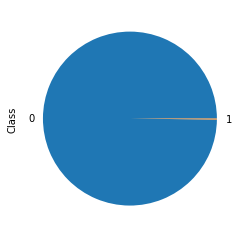

In [15]:
dataset['Class'].value_counts().plot.pie()

In [6]:
print(dataset.groupby('Class').size())

Class
0    284315
1       492
dtype: int64


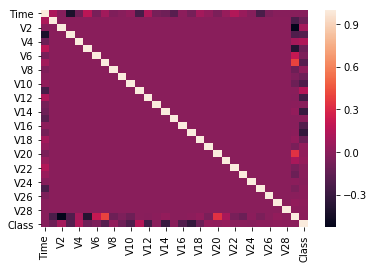

In [8]:
sns.heatmap(dataset.corr())

From this correlation matrix I see that Class has some correlation with a few of the features with V17 having some noticeable negative correlation with Class. The difficulty in spotting any particularly strong correlation likely stems from the extreme lack of representation from class '1'.

For my own information, I want to redo this correlation matrix, as well as some other exploratory visualization, with a smaller, randomly selected sample set, with weighting to get better representation from the class '1'. To do this, I want to first make sure we do not have any NULL values in our data

In [4]:
#Check if there are any NULL values in the dataset
dataset.isnull().values.any()

False

Here I want to create a subset of my data that consists of all of my class '1' examples, and an equal amount of my class '0' samples. I will do this by downsampling my majority class, class '0', and combining that dataset with the data from my minority class, class '1', into a new subdataset.

In [135]:
data_fraud = dataset[dataset.Class==1]
data_legit = dataset[dataset.Class==0]
sub_legit = data_legit.sample(n=492)

subdata = pd.concat([data_fraud, sub_legit])

print(subdata.groupby('Class').size())

Class
0    492
1    492
dtype: int64


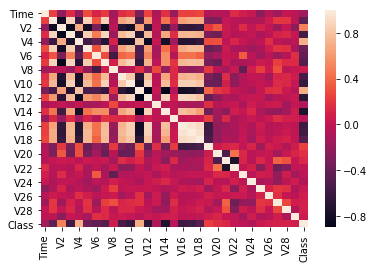

In [159]:
sns.heatmap(subdata.corr())

Now our correlation matrix has a lot more going on. It would appear that, at least for V1 through V18, neighboring features have a lot of correlation with one another. Interestingly, V4 and V11 now appear to have very strong positive correlation with the Class value.

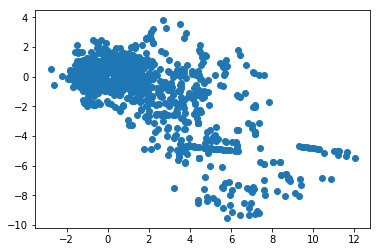

In [161]:
plt.scatter(subdata['V11'], subdata['V18'])

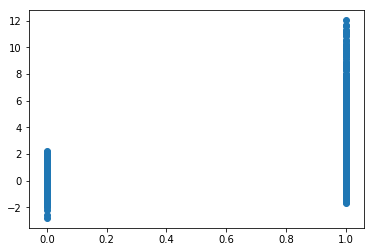

In [163]:
plt.scatter(subdata['Class'], subdata['V11'])

Based on this scatterplot, it would seem that 'higher' values of V11 increase the likelyhood a transaction was fraudulent

I will continue to use this sub-dataset going forward, as I feel it gives me the best chance to represent both classes as fairly as possible

### Pre-Processing

Just to verify, despite doing so already, I want to make sure I have no NULL values

In [15]:
#Check if there are any NULL values in the dataset
dataset.isnull().values.any()

False

I'm going to drop the 'Time' feature, as it only represents the time elapsed from the first tracked transaction

In [112]:
subdata = subdata.drop('Time', axis=1)

In [166]:
#Create my X and Y from the data and class labels
X = subdata.drop('Class', axis = 1)
y = subdata['Class']

#Normalize my X data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split my data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)

### Experiment

In [17]:
#Code taken from SVM example provided in Canvas
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

I need three different SVM models, with three different kernels

In [134]:
#Initialize the models
svm_lin = SVC(kernel='linear', gamma='scale')
svm_pol = SVC(kernel='poly', gamma='scale')
svm_rbf = SVC(kernel='rbf', gamma='scale')

In [165]:
#fit the models to the training data
svm_lin.fit(X_train, y_train)
pred_lin = svm_lin.predict(X_test)
lin_score = svm_lin.decision_function(X_test)

[-10, 10, -10, 10]

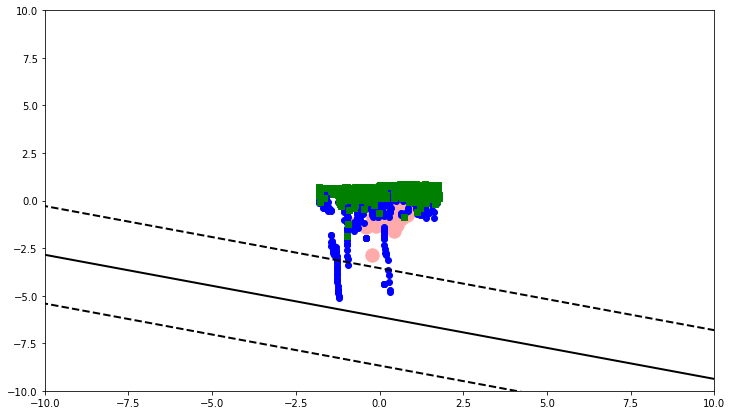

In [167]:
plt.figure(figsize=(12,7))
plt.plot(X_scaled[:,0][y==1], X_scaled[:,1][y==1], 'bo')
plt.plot(X_scaled[:,0][y==0], X_scaled[:,1][y==0], 'gs')
plot_svc_decision_boundary(svm_lin, -30, 30)

plt.axis([-10,10,-10,10])           

This doesn't give me a lot to work with, as the data is not linearly separable, at least not in this space.

In [131]:
svm_pol.fit(X_train, y_train)
pred_pol = svm_pol.predict(X_test)
pol_score = svm_pol.decision_function(X_test)

In [169]:
svm_rbf.fit(X_train, y_train)
pred_rbf = svm_rbf.predict(X_test)
rbf_score = svm_rbf.decision_function(X_test)

In [119]:
#Code taken from Assignment 2
def confusion_matrix(Y, T):
    """
        Y    nd.array
             predicted labels
        T    nd.array
             target labels
             
        @cfm DataFrame
             confusion matrix
    """
    
    if len(Y) != len(T):
        raise ValueError("Wrong prediction and target length!")
    
    classes = np.unique(T)
    n_classes = len(classes)
    
    cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
    
    Tidx = [T == c for c in classes]
    for c in classes:
        pred_idx = Y == c
        cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]
    
    return cfm

In [127]:
#Create Confusion Matricies for all three models
cfm = confusion_matrix(y_test, pred_lin)
print("Linear CFM: ")
print(cfm)

Linear CFM: 
     0    1
0  108    5
1   12  121


In [128]:
cfm = confusion_matrix(y_test, pred_pol)
print("Poly CFM: ")
print(cfm)

Poly CFM: 
     0    1
0  113    0
1   31  102


In [129]:
cfm = confusion_matrix(y_test, pred_rbf)
print("RBF CFM: ")
print(cfm)

RBF CFM: 
     0    1
0  110    3
1   14  119


In [171]:
#Calculate F-Scores and accuracy for all three models
#TP/(TP+(FN+FP)/2)

#Linear
FLin = 108/(108 + (5+12)/2)
ALin = (108 + 121)/(108+121+5+12)

#Polynomial
FPol = 113/(113 + (0 + 31)/2)
APol = (113 + 102)/(113+102+0+31)

#RBF
FRbf = 110/(110 + (3 + 14)/2)
ARbf = (110 + 119)/(110+119+3+14)

print("F-Scores:")
print("Linear: ", FLin)
print("Poly: ", FPol)
print("RBF: ", FRbf)

print("Accuracy")
print("Linear: ", ALin)
print("Poly: ", APol)
print("RBF: ", ARbf)

F-Scores:
Linear:  0.927038626609442
Poly:  0.8793774319066148
RBF:  0.9282700421940928
Accuracy
Linear:  0.9308943089430894
Poly:  0.8739837398373984
RBF:  0.9308943089430894


In [100]:
#Visualization code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
def plot_precision_recall(y_test, y_score):
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
    step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
    plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    #plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          #average_precision))

Text(0.5, 1.0, 'Linear Kernel Precision-Recall curve: AP=0.98')

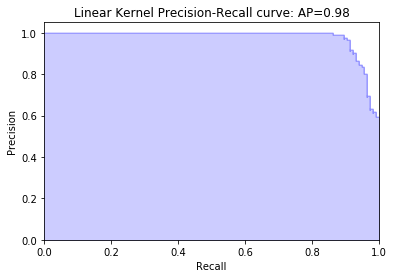

In [107]:
#Plot Precision-Recall curves for all three models
plot_precision_recall(y_test, lin_score)
average_precision = average_precision_score(y_test, lin_score)
plt.title('Linear Kernel Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

Text(0.5, 1.0, 'Polynomial Kernel Precision-Recall curve: AP=0.96')

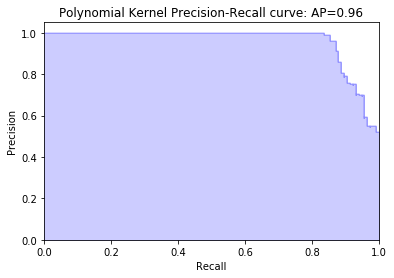

In [103]:
plot_precision_recall(y_test, pol_score)
average_precision = average_precision_score(y_test, pol_score)
plt.title('Polynomial Kernel Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

Text(0.5, 1.0, 'Radian Basis Function Kernel Precision-Recall curve: AP=0.98')

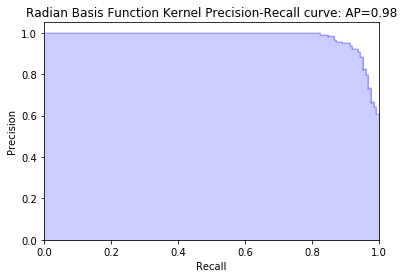

In [170]:
plot_precision_recall(y_test, rbf_score)
average_precision = average_precision_score(y_test, rbf_score)
plt.title('Radian Basis Function Kernel Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))